# 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 定义函数

In [2]:
def load_data():
    """ load iris data
    Notes:
        - 3 classes x 50 samples/class
    """
    data, target = load_iris(return_X_y=True)
    X_train = np.zeros(shape=(data.shape[0]//2, data.shape[1]))
    X_test  = np.zeros(shape=(data.shape[0]//2, data.shape[1]))
    Y_train = np.zeros(shape=target.shape[0]//2)
    Y_test  = np.zeros(shape=target.shape[0]//2)
    for i in range(3):
        X_train[i*25: (i+1)*25] = data[i*50: i*50+25]
        X_test[i*25: (i+1)*25]  = data[i*50+25: (i+1)*50]
        Y_train[i*25: (i+1)*25] = target[i*50: i*50+25]
        Y_test[i*25: (i+1)*25]  = target[i*50+25: (i+1)*50]
    return X_train, Y_train, X_test, Y_test
def distance(x1, x2, type='Euclidean'):
    if type == 'Euclidean':
        return np.linalg.norm(x1-x2)
    elif type == 'Cosine':
        return x1.T.dot(x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))
def showfig(X, y_true, y_pred):
    figX = np.arange(0, 75)
    plt.figure()
    plt.axvline(25);plt.axvline(50)
    plt.scatter(figX, y_pred, c=y_true)
    plt.show()

# 定义类

In [3]:
class KNN():
    def __init__(self, n_neighbor, type='Euclidean'):
        self.n_neighbor = n_neighbor
        self.type = type
        self.samples = None
        self.labels = None
        self.n_clusters = None
        self.n_samples = None
    def fit(self, X, y):
        self.samples = X
        self.labels = y
        self.n_clusters = len(set(list(y)))
        self.n_samples = X.shape[0]
    def predict(self, X):
        """
        Parameters:
            X {ndarray(n_samples, n_features)}
        Returns:
            y_pred {ndarray(n_samples,)}
        """
        (n_samples, n_features) = X.shape
        y_pred = np.zeros(shape=(n_samples, ))
        for i in range(n_samples):
            dists = np.zeros(shape=(self.n_samples))
            for j in range(self.n_samples):
                dists[j] = distance(X[i], self.samples[j], type=self.type)
        
            if self.type == 'Euclidean':
                order = np.argsort(dists)[: self.n_neighbor]
            elif self.type == 'Cosine':
                order = np.argsort(dists)[::-1][: self.n_neighbor]
            
            labels = self.labels[order]
            count = np.bincount(labels.astype('int'))
            y_pred[i] = np.argmax(count)
        return y_pred

# 载入数据集

In [4]:
X_train, y_train, X_test, y_test = load_data()

# 用欧式距离进行分类

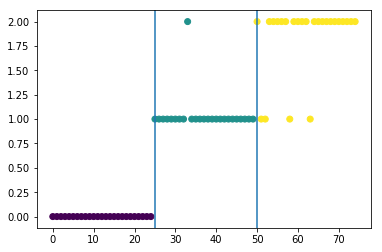

In [5]:
estimator_euc = KNN(n_neighbor=15, type='Euclidean')
estimator_euc.fit(X_train, y_train)
y_pred_euc = estimator_euc.predict(X_test)
showfig(X_test, y_test, y_pred_euc)

# 用余弦距离进行分类

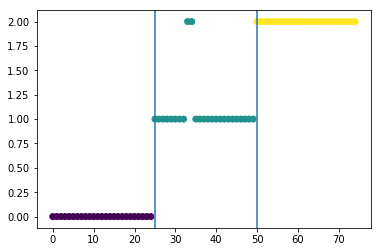

In [6]:
estimator_cos = KNN(n_neighbor=15, type='Cosine')
estimator_cos.fit(X_train, y_train)
y_pred_cos = estimator_cos.predict(X_test)
showfig(X_test, y_test, y_pred_cos)